Hello Everyone!! This is my first attempt to create a notebook. Constructive feedback will be appreciated :)

## STEPS

1)Importing necessary Libraries

2)Importing and understanding the required data

3)Exploratory data analysis and data visualization

4)Data cleaning

5)Model selection

6)Final submission file


## 1)Importing necessary libraries

In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns #for plotting data

from sklearn.preprocessing import LabelEncoder #to convert categorical variables into numerical values

#different models used
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 2)Importing and understanding the data

In [80]:
train = pd.read_csv("C:/Users/96gup/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/96gup/Desktop/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taylor, Mr. Elmer Zebley",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Some initial conclusions(by looking at raw data)

-  Three features __'Age'__ , __'Cabin'__ and __'Embarked'__ have missing values.These need to be adressed.
-  'Age' seems to be an important feature for predicting survival rates and hence we should not discard it.
-  'Cabin' has a lot of NULL values and may not provide much information so it may be discarded.
-  'Embarked' only has 2 NULL values so they  will be filled with the  maximum ocurring category.

## 3)Exploratory data analysis and data visualization

### a. Survival based on the passenger class

Percentage of Pclass = 1 who survived: 63.0 %
Percentage of Pclass = 2 who survived: 47.0 %
Percentage of Pclass = 3 who survived: 24.0 %


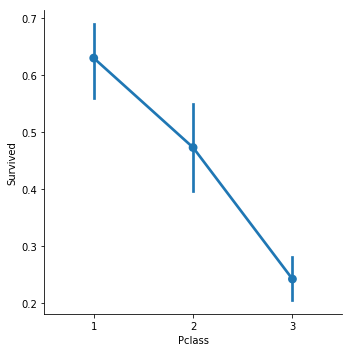

In [84]:
print("Percentage of Pclass = 1 who survived:", round(train["Survived"][train["Pclass"] == 1]
                                                      .value_counts(normalize = True)[1]*100),"%")

print("Percentage of Pclass = 2 who survived:", round(train["Survived"][train["Pclass"] == 2]
                                                      .value_counts(normalize = True)[1]*100),"%")

print("Percentage of Pclass = 3 who survived:", round(train["Survived"][train["Pclass"] == 3]
                                                      .value_counts(normalize = True)[1]*100),"%")

sns.catplot(x = 'Pclass' , y = 'Survived',kind = 'point',data = train);




__This shows that the Upper class are the ones with the best survival percentage.(Oooh the power of money!!!!)__

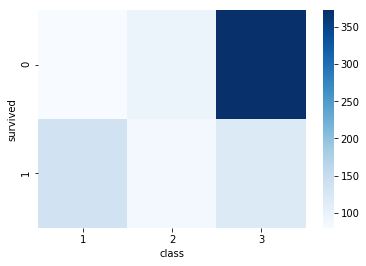

In [85]:
survived_Pclass = pd.crosstab(index=train["Survived"], 
                           columns=train["Pclass"],rownames=["survived"],colnames=["class"])


sns.heatmap(survived_Pclass,cmap='Blues')

### b. Survival based on Sex

Survival % of Male: 19.0 %
Survival % of Female: 74.0 %


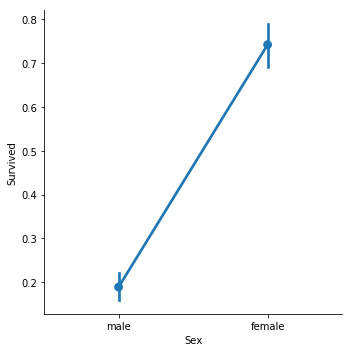

In [86]:
print("Survival % of Male:", round(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100),"%")

print("Survival % of Female:", round(train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100),"%")
sns.catplot(x = 'Sex' , y = 'Survived',kind = 'point',data = train);

__Females have a significant higher chance of surviving than males.....(Ladies First!!!)__

### c) Survival based on SibSp and Parch

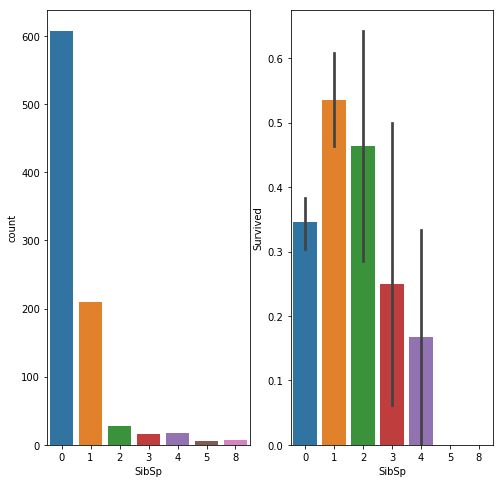

In [87]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1=sns.catplot(x = 'SibSp',kind = 'count',data = train,ax = ax1);
g2=sns.catplot(x = 'SibSp' , y = 'Survived',kind = 'bar',data = train,ax = ax2);
plt.close(g1.fig)
plt.close(g2.fig)
plt.show()

In [88]:
for i in range(0,max(train["SibSp"])+1):
    if i in (6,7):
        continue
    else:
        print("Total passengers with", i , "siblings and/or spouse:" ,train["SibSp"].value_counts(sort = False)[i])

Total passengers with 0 siblings and/or spouse: 608
Total passengers with 1 siblings and/or spouse: 209
Total passengers with 2 siblings and/or spouse: 28
Total passengers with 3 siblings and/or spouse: 16
Total passengers with 4 siblings and/or spouse: 18
Total passengers with 5 siblings and/or spouse: 5
Total passengers with 8 siblings and/or spouse: 7


-  __Since the sample size of passengers with SibSp > 2 is very less(less than 20),hence the survival rate trends can be misleading for them.__
-  __But it can clearly be seen that those with 1 or 2 SibSp had a higher rate of survival than those with 0 SibSp.__


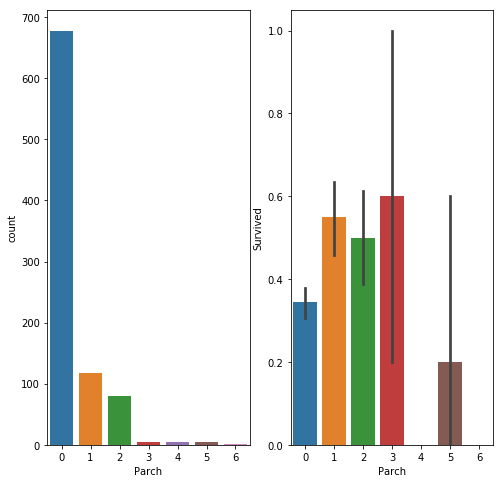

In [89]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1=sns.catplot(x = 'Parch',kind = 'count',data = train,ax = ax1);
g2=sns.catplot(x = 'Parch' , y = 'Survived',kind = 'bar',data = train,ax = ax2);
plt.close(g1.fig)
plt.close(g2.fig)
plt.show()

In [90]:
for i in range(0,max(train["Parch"])+1):
    print("Total passengers with", i , "parent or child:" ,train["Parch"].value_counts(sort = False)[i])

Total passengers with 0 parent or child: 678
Total passengers with 1 parent or child: 118
Total passengers with 2 parent or child: 80
Total passengers with 3 parent or child: 5
Total passengers with 4 parent or child: 4
Total passengers with 5 parent or child: 5
Total passengers with 6 parent or child: 1


-  __Again since the sample size of passengers with Parch > 2 is very less(less than 10),hence the survival rate trends can be misleading for them.__
-  __But it can clearly be seen that those with 1 or 2 Parch had a higher rate of survival than those with 0 SibSp.__

### NOTE: 
I could not decide whether to perform analysis on __"Embarked"__ and __"Age"__ features before or after filling the missing values.
Is there any rule on whether we should perform data cleaning  first followed by data analysis or vice versa???? If there is then please explain in the comments.
I have decided to first clean the data and then perform analysis on above two features. 

## 4) Data cleaning

__At the beginning we looked at our training dataset. Now let's take a look at our test dataset before cleaning them.__

In [91]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [92]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

-  __'Cabin'__ feature has a lot of NULL values and does not give much useful information so it may be dropped
-  __'Fare' and 'Ticket'__ features may  also be dropped.
-  __'Age'__ feature is important so missing values has to be filled.

__So we need to fill 'Age' and 'Embarked' missing values in our training dataset and 'Age' missing values in our test dataset__
__Unnecessary features will be dropped once the cleaning part  is done__

### Working with 'Age' feature

Since there are a lot of missing values so rather than just filling them with average age I will first calculate the average age corresponding to each __title__(Title will be extracted out from the __'Name'__ feature) and then missing age values will be filled with avg age value corresponding  to  the title of the person whose age is missing.  

In [93]:
# combining both train and test datasets because both have missing Age values
TrainTest = [train, test]

#extract a title for each Name in the train and test datasets
for data in TrainTest:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [94]:
#To ease the analysis combining the titles into fewer categories
for data in TrainTest:
    data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    data['Title'] = data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [95]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [96]:
#Calculating the average age according to each title
title= ['Mr','Miss','Mrs','Master','Royal','Rare'];
mr_age = round(train[train["Title"] == 'Mr']["Age"].median()) 
print('Average age of title Mr: ',mr_age)
miss_age = round(train[train["Title"] == 'Miss']["Age"].median())
print('Average age of title Miss: ',miss_age)
mrs_age = round(train[train["Title"] == 'Mrs']["Age"].median())
print('Average age of title Mrs: ',mrs_age)
master_age = round(train[train["Title"] == 'Master']["Age"].mean())
print('Average age of title Master: ',master_age)
royal_age = round(train[train["Title"] == 'Royal']["Age"].mean())
print('Average age of title Royal: ',royal_age)
rare_age = round(train[train["Title"] == 'Rare']["Age"].mean())
print('Average age of title Rare: ',rare_age)
avg_age = [mr_age,miss_age,mrs_age,master_age,royal_age,rare_age]

Average age of title Mr:  30.0
Average age of title Miss:  21.0
Average age of title Mrs:  35.0
Average age of title Master:  5.0
Average age of title Royal:  41.0
Average age of title Rare:  46.0


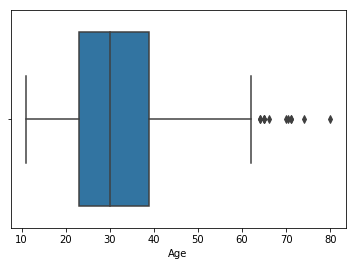

In [97]:
sns.boxplot(train[train["Title"] == 'Mr']["Age"])

In [98]:
#Filling the missing values in train dataset
n_rows= train.shape[0]   
n_titles= len(title)
for i in range(0, n_rows):
    if np.isnan(train.Age[i])==True:
        for j in range(0, n_titles):
            if train.Title[i] == title[j]:
                train.Age[i] = avg_age[j]

train['Age'].isnull().sum()

0

In [99]:
#Filling the missing values in test dataset  
n_rows= test.shape[0]   
n_titles= len(title)
for i in range(0, n_rows):
    if np.isnan(test.Age[i])==True:
        for j in range(0, n_titles):
            if test.Title[i] == title[j]:
                test.Age[i] = avg_age[j]

test['Age'].isnull().sum()


0

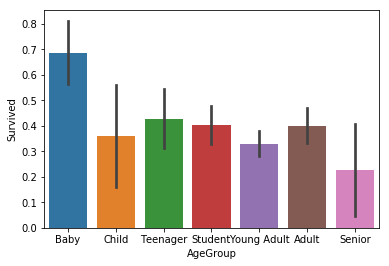

In [100]:
#Creating different AgeGroups
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

-  __Babies have the greatest chance of survival__

### 'Embarked' feature


Since there are only 2 missing values in training set and none in test set hence we will directly fill those 2 missing values with the maximum occuring option.

Number of people embarking in S: 644
Number of people embarking in C: 168
Number of people embarking in Q: 77


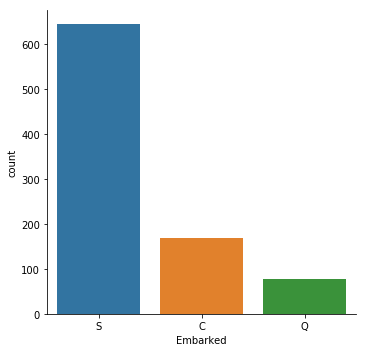

In [101]:
print("Number of people embarking in S:",train[train["Embarked"] == "S"].shape[0]) 


print("Number of people embarking in C:",train[train["Embarked"] == "C"].shape[0])


print("Number of people embarking in Q:",train[train["Embarked"] == "Q"].shape[0])

sns.catplot(x='Embarked',kind = 'count',data=train)
plt.show()

__Clearly most of the people embarked at 'S' so we will fill the missing values with the same.__

In [102]:
train = train.fillna({"Embarked": "S"})
train['Embarked'].isnull().sum()

0

__Now that all the missing values of important features have been filled ,the two things left to do are:__  
1.  to map the non-numerical feature values into numerical values before using them to train the model
2.  to drop the unnecessary features

But first let us take a look at our training and test dataset.

In [103]:
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young Adult
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Teenager


In [104]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Student
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr,Teenager
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss,Young Adult
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr,Young Adult
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs,Teenager
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr,Student


## Mapping the features 'AgeGroup' ,'Embarked' and 'Sex'

In [105]:
#Age Group
labelEncoder = LabelEncoder()
train.AgeGroup=labelEncoder.fit_transform(train.AgeGroup)
test.AgeGroup=labelEncoder.fit_transform(test.AgeGroup)

In [106]:
#Sex
train.Sex=labelEncoder.fit_transform(train.Sex)
test.Sex=labelEncoder.fit_transform(test.Sex)

In [107]:
train.Embarked=labelEncoder.fit_transform(train.Embarked)
test.Embarked=labelEncoder.fit_transform(test.Embarked)

## Dropping features which are not required

In [108]:
train=train.drop(['Name','Age','Ticket','Fare','Cabin','Title'],axis=1)
test=test.drop(['Name','Age','Ticket','Fare','Cabin','Title'],axis=1)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,1,1,0,2,4
1,2,1,1,0,1,0,0,0
2,3,1,3,0,0,0,2,6
3,4,1,1,0,1,0,2,6
4,5,0,3,1,0,0,2,6


In [110]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,892,3,1,0,0,1,6
1,893,3,0,1,0,2,0
2,894,2,1,0,0,1,3
3,895,3,1,0,0,2,6
4,896,3,0,1,1,2,4


Now our data is clean and ready and its time to chose the best model.

# Model selection

__To test the accuracy of different models 20% of our training data will be used and the model with highest score will be selected__

In [111]:
#Splitting the data
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

## Different models used:

-  Gaussian Naive Bayes
-  Logistic Regression
-  Support Vector Machines
-  Perceptron
-  Decision Tree Classifier
-  Random Forest Classifier
-  KNN or k-Nearest Neighbors
-  Stochastic Gradient Descent
-  Gradient Boosting Classifier

In [112]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.77


In [113]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.89


In [114]:
#Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.56


In [115]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

69.83


In [116]:
#Decision Tree Classifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.45


In [117]:
# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.56


In [118]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.8


In [119]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

76.54


In [120]:
# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.24


In [121]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,83.80
8,Gradient Boosting Classifier,83.24
0,Support Vector Machines,81.56
3,Random Forest,81.56
6,Decision Tree,80.45
2,Logistic Regression,79.89
4,Naive Bayes,78.77
7,Stochastic Gradient Descent,76.54
5,Perceptron,69.83


__Since Gradient Boosting Classifier has the best score I will be using that for prediction__

In [124]:
ids = test['PassengerId']
predictions = knn.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('prediction.csv', index=False)

__Creating this notebook was really fun and I got to learn a lot of things.No doubt this is the best way to learn Data Science for newbies like me. 
I hope this notebook will be useful in someway for people new to this.If it is then please Upvote it :).__

### Since this was my first attempt at this, I had to take some ideas  from other amazing  sources present here...
### Here are the link to these amazing notebooks

-  https://www.kaggle.com/startupsci/titanic-data-science-solutions
-  https://www.kaggle.com/omarelgabry/a-journey-through-titanic
-  https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner
-  https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners


# Please provide your valuable feedback on this and ways to improve it!!!
# Thank You